<a href="https://colab.research.google.com/github/zahoororakzai11/machine-learning/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

print(tf.__version__)  # You should see a 2.0.0 here!

2.13.0


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tf.keras.models.Sequential
tf.keras.layers.Dense, tf.keras.layers.Activation,
tf.keras.layers.Dropout, tf.keras.layers.Flatten, tf.keras.layers.Reshape
tf.keras.optimizers.SGD
tf.keras.preprocessing.image.ImageDataGenerator
tf.keras.regularizers
tf.keras.datasets.mnist



<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

## Part 1: Neural Networks 101

In [21]:
# Matrix Multiplication and constant addition
a = np.array([[1,0],[0,1],[2,3]])
b = np.array([[4,1,1],[2,2,1]])
print(np.matrix(a))
print('---------------')
print(np.matrix(b))

[[1 0]
 [0 1]
 [2 3]]
---------------
[[4 1 1]
 [2 2 1]]


In [20]:
# tensorflow way
c = tf.matmul(a,b)
print(c)
d = np.dot(a,b)
print(d)

tf.Tensor(
[[ 4  1  1]
 [ 2  2  1]
 [14  8  5]], shape=(3, 3), dtype=int64)
[[ 4  1  1]
 [ 2  2  1]
 [14  8  5]]


In [30]:
# how can we add constant in the matrix
a = [[1,0],[0,1]]
one = np.ones((len(a),1))
one
a = np.append(a,one,axis = 1)
a

array([[1., 0., 1.],
       [0., 1., 1.]])

## Plot the sigmoid

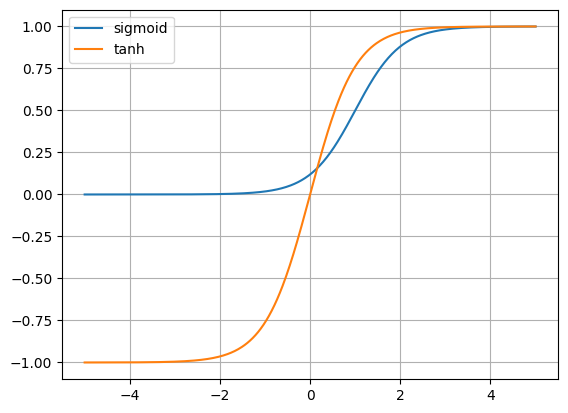

In [36]:
def sigmoid(x,c,a):
  z = ((x-c)/a)
  return 1.0 /(1.0 + np.exp(-z))

x = np.linspace(-5.0,5.0,500) # input points
c = 1.
a = 0.5
plt.plot(x,sigmoid(x,c,a),label= 'sigmoid')
plt.plot(x,np.tanh(x),label = 'tanh')
plt.grid();
plt.legend();

## Start by plotting above function using the x dataset you created earlier

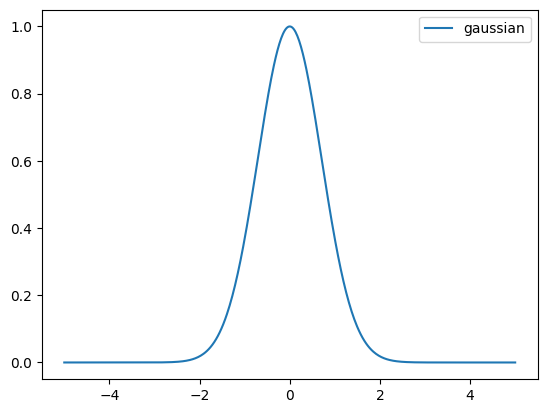

In [37]:
x = np.linspace(-5.0,5.0,500)  #input points
def gaussian(x):
  return np.exp(-x * x)

f = gaussian(x)
plt.plot(x,f,label='gaussian')
plt.legend()

In [38]:
def affine(x, w, b):
    """Return affine transformation of x

    INPUTS
    ======
    x: A numpy array of points in x
    w: An array representing the weight of the perceptron
    b: An array representing the biases of the perceptron

    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """

    # Code goes here
    return z

In [39]:
# %load solutions/affine-sigmoid.py
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

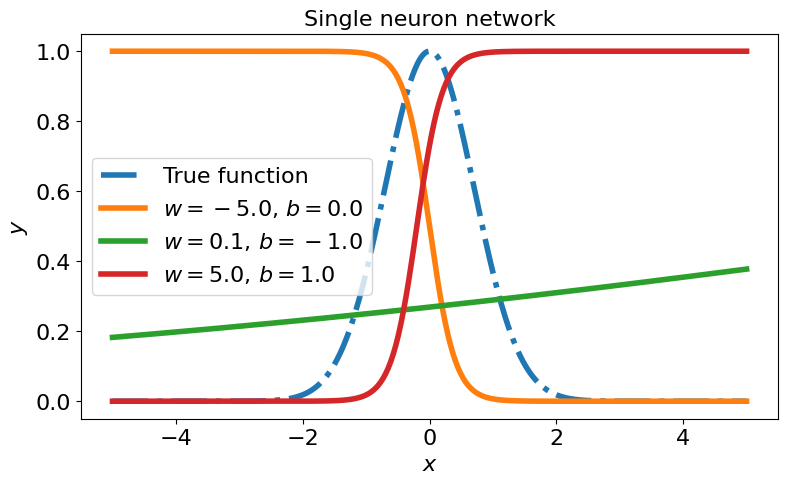

In [40]:
w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(9,5))
SIZE = 16

# plot our true function, the gaussian
ax.plot(x, f, lw=4, ls='-.', label='True function')

# plot 3 "networks"
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi,bi))

ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read


## Multiple Perceptrons in a Single Layer

In [43]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([3.5, -3.5])
b = np.array([3.5, 3.5])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = sigmoid(z1)
h2 = sigmoid(z2)

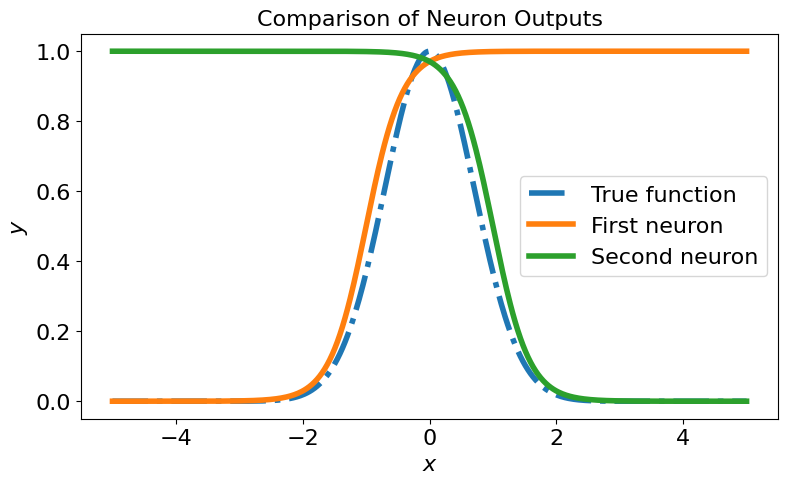

In [50]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

In [51]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = -1 # bias
yout = wout[0] * h1 + wout[1] * h2 + bout

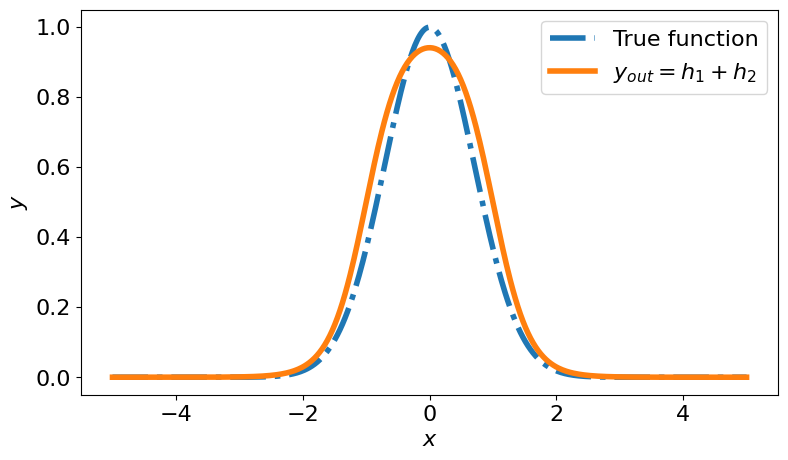

In [52]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

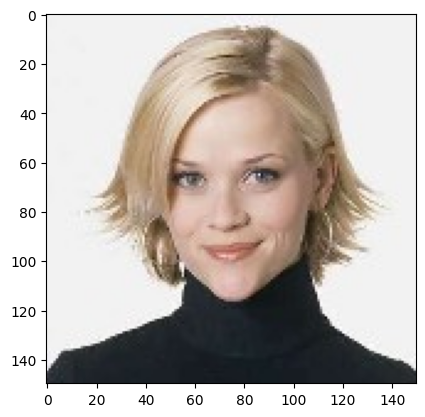

In [53]:
# load and show the image
FILE = '/content/sample_data/Reese_Witherspoon_0002.jpg'
img = mpimg.imread(FILE)
imgplot = plt.imshow(img)

In [54]:
print(f'The image is a: {type(img)} of shape {img.shape}')
img[3:5, 3:5, :]

The image is a: <class 'numpy.ndarray'> of shape (150, 150, 3)


array([[[241, 241, 241],
        [242, 242, 242]],

       [[241, 241, 241],
        [242, 242, 242]]], dtype=uint8)

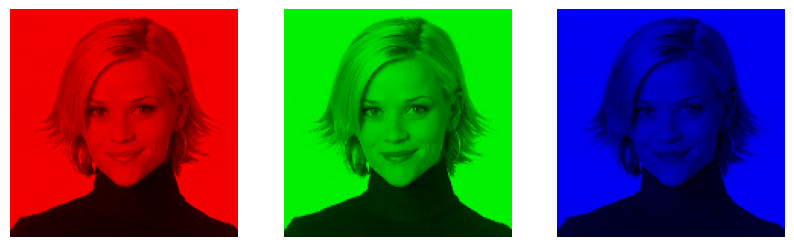

In [55]:
# we want to show each color channel
fig, axes = plt.subplots(1, 3, figsize=(10,10))
for i, subplot in zip(range(3), axes):
    temp = np.zeros(img.shape, dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

## Anatomy of an Artificial Neural Network


## 1. Load the data

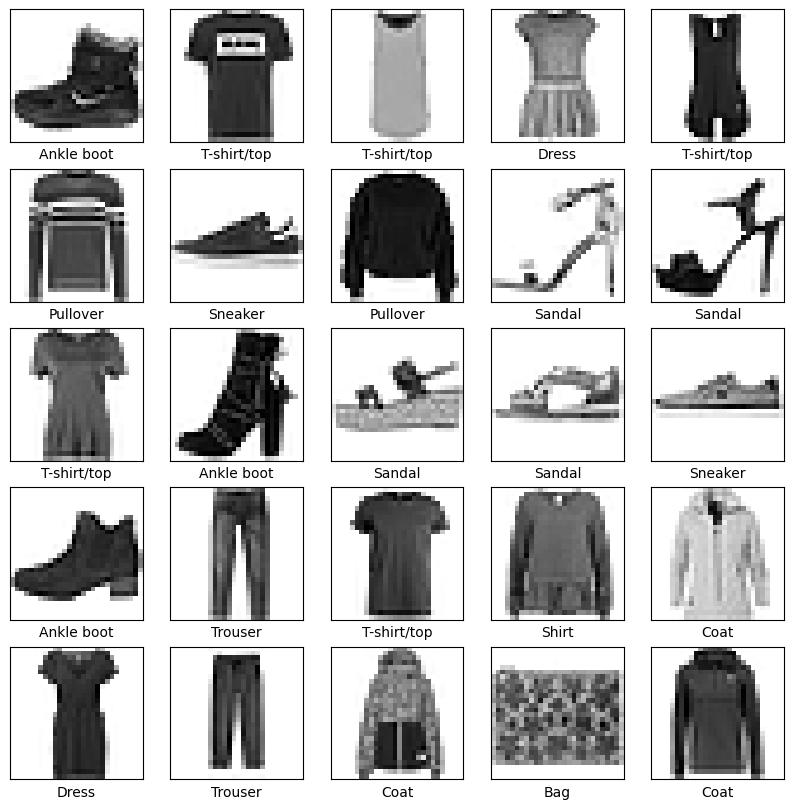

In [58]:
fashion_mint = tf.keras.datasets.fashion_mnist

# load the data splitted in train and test
(x_train,y_train),(x_test,y_test) = fashion_mint.load_data()

#normalize the data by dividing with pixel
x_train, x_test = x_train /  255.0,x_test / 255.0

# classes are named 0-9 so define names for plotting clarity
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

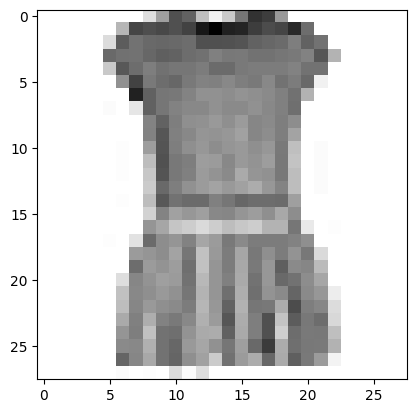

In [59]:
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [62]:
#Define the layers of the model
#type together
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(154, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [65]:
#compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 154)               120890    
                                                                 
 dense_5 (Dense)             (None, 64)                9920      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 131460 (513.52 KB)
Trainable params: 131460 (513.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


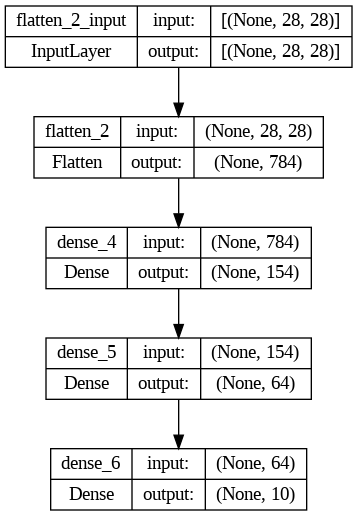

In [67]:
tf.keras.utils.plot_model(
    model,
    #to_file='model.png', # if you want to save the image
    show_shapes=True, # True for more details than you need
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [68]:
%%time

# the core of the network training
history = model.fit(x_train, y_train, validation_split=0.33, epochs=50,
                    verbose=2)

Epoch 1/50
1257/1257 - 12s - loss: 0.5279 - accuracy: 0.8127 - val_loss: 0.4244 - val_accuracy: 0.8444 - 12s/epoch - 9ms/step
Epoch 2/50
1257/1257 - 5s - loss: 0.3854 - accuracy: 0.8605 - val_loss: 0.3974 - val_accuracy: 0.8601 - 5s/epoch - 4ms/step
Epoch 3/50
1257/1257 - 5s - loss: 0.3480 - accuracy: 0.8707 - val_loss: 0.3533 - val_accuracy: 0.8732 - 5s/epoch - 4ms/step
Epoch 4/50
1257/1257 - 5s - loss: 0.3215 - accuracy: 0.8794 - val_loss: 0.3493 - val_accuracy: 0.8734 - 5s/epoch - 4ms/step
Epoch 5/50
1257/1257 - 5s - loss: 0.3010 - accuracy: 0.8867 - val_loss: 0.3330 - val_accuracy: 0.8809 - 5s/epoch - 4ms/step
Epoch 6/50
1257/1257 - 5s - loss: 0.2865 - accuracy: 0.8919 - val_loss: 0.3887 - val_accuracy: 0.8618 - 5s/epoch - 4ms/step
Epoch 7/50
1257/1257 - 5s - loss: 0.2718 - accuracy: 0.8994 - val_loss: 0.3233 - val_accuracy: 0.8847 - 5s/epoch - 4ms/step
Epoch 8/50
1257/1257 - 5s - loss: 0.2599 - accuracy: 0.9026 - val_loss: 0.3317 - val_accuracy: 0.8792 - 5s/epoch - 4ms/step
Epoch 

## Save the model

In [69]:
# save the model so you do not have to run the code everytime
model.save('fashion_model.h5')

# Recreate the exact same model purely from the file
#model = tf.keras.models.load_model('fashion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluate the model on the test set.

In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy={test_accuracy}')

Test accuracy=0.8859999775886536


## We learn a lot by studying History! Plot metrics such as accuracy.


In [71]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


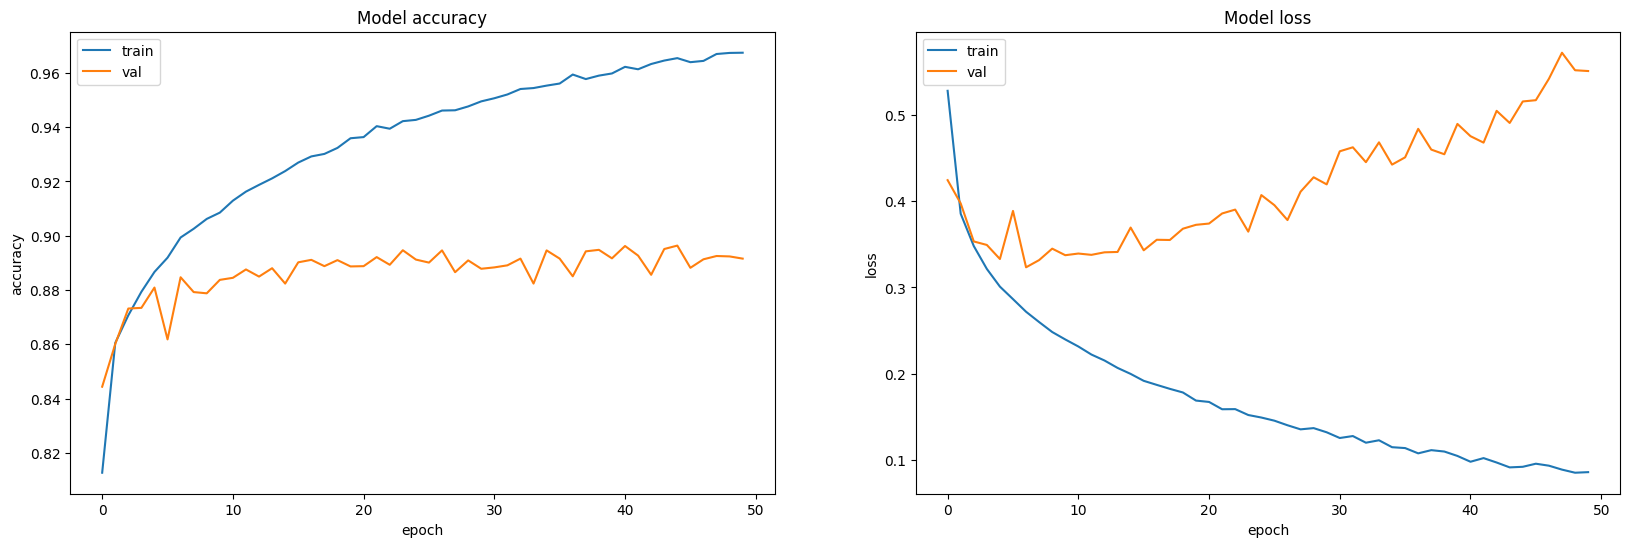

In [72]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

##  Now let's use the Network for what it was meant to do: Predict!

In [73]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([7.4392608e-13, 1.4717474e-24, 4.6573126e-18, 2.2765067e-16,
       8.8901762e-16, 6.1455944e-07, 7.4677791e-13, 3.8032633e-06,
       1.2025001e-13, 9.9999559e-01], dtype=float32)

In [74]:
np.argmax(predictions[0]), class_names[np.argmax(predictions[0])]

(9, 'Ankle boot')

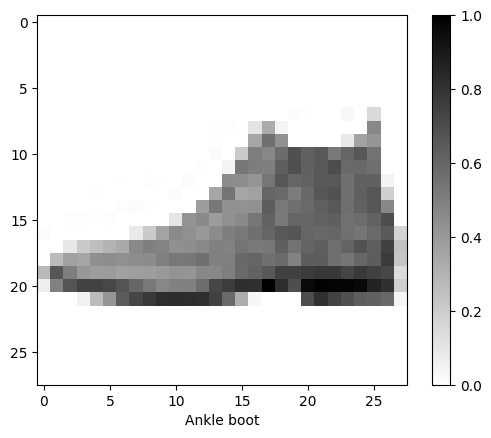

In [75]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]])
plt.colorbar()

#### Correct!! Now let's see how confident our model is by plotting the probability values:

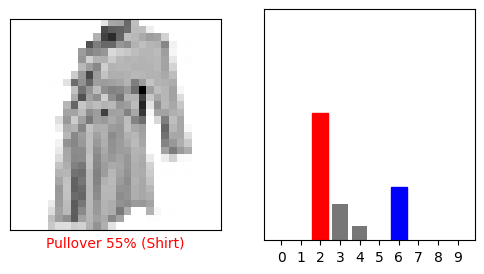

In [76]:
# code source: https://www.tensorflow.org/tutorials/keras/classification
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
i = 406
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()